In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hurst Exponent

1. The Hurst exponent is used as a measure of **long-term memory of time series**. 
2. It relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases.
> The goal of the Hurst Exponent is to provide us with a scalar value that will help us to identify (within the limits of statistical estimation) **whether a series is mean reverting, random walking or trending**.

**Calculations**
1. if hurst_exp **< 0.5** means series is **mean reverting**
2. if hurst_exp **= 0.5** means series is effectively **random/geometric brownian motion** 
3. if hurst_exp **> 0.5** means series is **trending**

In [ ]:
def hurst_exp(input_ts, lags_to_test=150):
    
    tau = []
    lags = []
    
    for lag in range(2, lags_to_test, 1):
        
        lags.append(lag)
        
        # price difference between original series and its lagged part
        price_diff = np.subtract(input_ts[lag:].values, 
                                 input_ts[:-lag].values)
        
        # var is the variance of the price difference series
        var = np.sqrt(np.nanstd(price_diff))
        tau.append(var)
        
    # polyfitting the double-legged series    
    m = np.polyfit(np.log10(lags), np.log10(tau), 1)
    
    hurst = m[0]*2
    
    return hurst

In [ ]:
# this is the list of all the stocks  that we will be using

stocklist = pd.read_table(r"C:\Users\Dell\Desktop\FAC_MRTS_Project\Hurst_exp_stocklist.txt",
                          names=('A'))

## Stock VWAP

1. The **volume weighted average price (VWAP)** is a trading benchmark used by traders that gives the **average price** a security has traded at throughout the day, **based on both volume and price**. 
2. It is important because it provides traders with insight into both the **trend** and **value** of a security.

In [ ]:
# this is a list of tuples
# first element is stockname and second is hurst score
hurst_exp_list = []

for stockname in stocklist['A']:
    
    df_all = pd.read_csv("C:/Users/Dell/Desktop/FAC_MRTS_Project/stock_data_new/"+stockname+".csv", 
                         names=('Dates', 'stockVWAP', 'futureVWAP', 'bidPrice', 'askPrice', 'total_value', 'total_size'))
    
    df_train = df_all[:60000]
    
    df_train_resampled_10min = df_train[df_train.index % 10 == 0]
    df_train_resampled_10min.reset_index(drop=True)
    df = df_train_resampled_10min[:5999]
    
    hurst_score = hurst_exp(df['stockVWAP'])
    
    hurst_exp_list.append((stockname, hurst_score))

In [ ]:
hurst_scores = pd.DataFrame(hurst_exp_list)
hurst_scores = hurst_scores.rename(columns={0:'stockname', 1:'hurst_score'})

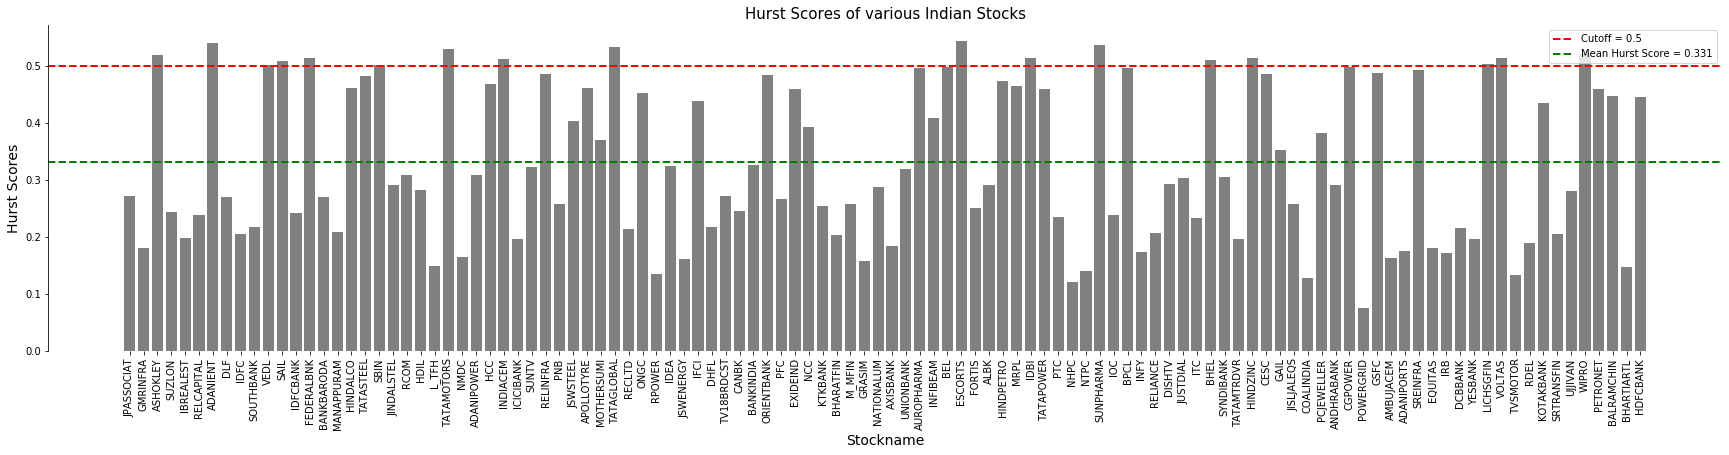

In [ ]:
fig, ax = plt.subplots(figsize=(30,6))
ax.bar(hurst_scores['stockname'],hurst_scores['hurst_score'], color='grey')
ax.axhline(y=0.5, color='red', ls='--',  label='Cutoff = 0.5', lw=2)
ax.axhline(y=hurst_scores.mean()[0], color='green', ls='--', label=f'Mean Hurst Score = {round(hurst_scores.mean()[0],3)}', lw=2)
plt.xlabel('Stockname', size=14)
plt.ylabel('Hurst Scores', size=14)
plt.title('Hurst Scores of various Indian Stocks', size=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
selected_stocks_hurst_scores = hurst_scores[hurst_scores['hurst_score']<0.5].reset_index(drop=True)

In [ ]:
selected_stocks_hurst_scores.to_csv(r'C:\Users\Dell\Desktop\FAC_MRTS_Project\selected_stocks_hurst_scores.csv')